# Open Access Analysis of Earth Science Citations

## Install Packages

In [1]:
import csv
import pandas as pd
from time import sleep
import re
import os
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

## Import files

In [2]:
ucb_data = pd.read_csv("Berkeley_References.csv", encoding="ISO-8859-1")
cub_data = pd.read_csv("Boulder_References.csv", encoding="ISO-8859-1")
uh_data = pd.read_csv("Houston_References.csv", encoding="ISO-8859-1")
ucla_data = pd.read_csv("UCLA_References.csv", encoding="ISO-8859-1")

In [3]:
#a little bit of clean up is required for one of the Berkeley dates.
ucb_data.loc[ucb_data['PY']==10] = 2010

## Examine Open Access publishing trends.

Open Access definitions assigned by Web of Science can be found here: https://images.webofknowledge.com/WOKRS533JR18/help/WOS/hp_results.html

In [4]:
#OA is the column header for Open Access type when available. 
#Take a look at the different types of Open Access represented for your campus. This example is for UC Berkeley.

oa_ucb = ucb_data['OA'].value_counts()
oa_ucb

Bronze                                         529
DOAJ Gold                                      449
Green Published                                346
Other Gold                                     129
Green Accepted                                 126
DOAJ Gold, Green Published                     109
DOAJ Gold, Green Accepted                       67
Green Published, Other Gold                     61
Other Gold, Green Published                     58
Green Published, Bronze                         47
Bronze, Green Published                         46
DOAJ Gold, Green Accepted, Green Published      17
Green Published, Green Accepted                 16
DOAJ Gold, Green Published, Green Accepted      15
Green Accepted, Green Published                 13
Green Accepted, Bronze                          13
Bronze, Green Accepted                          13
Other Gold, Green Published, Green Accepted      5
Green Published, Other Gold, Green Accepted      5
Green Published, Bronze, Green 

In [5]:
#The following will do the same for the other campuses.

oa_cub = cub_data['OA'].value_counts()
oa_uh = uh_data['OA'].value_counts()
oa_ucla = ucla_data['OA'].value_counts()

## Plot articles by year

### Berkeley

In [6]:
#First we'll make a table of all articles by year.
all_ucb = ucb_data[['OA','PY']].copy()
all_ucb['PY'] = pd.to_datetime(all_ucb['PY'], format='%Y').dt.strftime('%Y')
all_ucb = all_ucb['PY'].value_counts().rename_axis('date').reset_index(name='all articles')
all_ucb = all_ucb.sort_values('date', ascending=True)
all_ucb

,date,all articles
9,2010,420
6,2011,451
4,2012,505
3,2013,529
2,2014,543
0,2015,617
1,2016,558
7,2017,450
5,2018,469
8,2019,440


In [7]:
#Now we'll isolate just the articles tagged as some form of OA.

oa_time = ucb_data[['OA','PY']].dropna()
oa_time['PY'] = pd.to_datetime(oa_time['PY'], format='%Y').dt.strftime('%Y')
oa_time = oa_time['PY'].value_counts().rename_axis('date').reset_index(name='ucb counts')
oa_time = oa_time.sort_values('date', ascending=True)
oa_time

,date,ucb counts
9,2010,113
8,2011,137
6,2012,155
7,2013,146
4,2014,206
0,2015,324
1,2016,308
3,2017,245
2,2018,255
5,2019,195


In [8]:
#Merge these two tables into one.
all_ucb = all_ucb.merge(oa_time, on='date')
all_ucb

,date,all articles,ucb counts
0,2010,420,113
1,2011,451,137
2,2012,505,155
3,2013,529,146
4,2014,543,206
5,2015,617,324
6,2016,558,308
7,2017,450,245
8,2018,469,255
9,2019,440,195


In [9]:
#Calculate the percent of articles that have been identified as some form of Open Access.
all_ucb['percent'] = all_ucb['ucb counts']/all_ucb['all articles']*100
all_ucb

,date,all articles,ucb counts,percent
0,2010,420,113,26.904762
1,2011,451,137,30.376940
2,2012,505,155,30.693069
3,2013,529,146,27.599244
4,2014,543,206,37.937385
5,2015,617,324,52.512156
6,2016,558,308,55.197133
7,2017,450,245,54.444444
8,2018,469,255,54.371002
9,2019,440,195,44.318182


We'll now go through the process of calculating the percent of articles that are Open Access for the other campuses.

### Boulder

In [10]:
all_cub = cub_data[['OA','PY']].copy()
#One row has a date error (the year is listed as 28) in the Boulder file. 
#For expediency, we'll drop that row. 
#check = cub_data.loc[cub_data['PY'] == 28]
#check.at[4002, 'PY']
all_cub = all_cub.drop(4002)
all_cub['PY'] = pd.to_datetime(all_cub['PY'], format='%Y').dt.strftime('%Y')
all_cub = all_cub['PY'].value_counts().rename_axis('date').reset_index(name='all articles')
all_cub = all_cub.sort_values('date', ascending=True)
all_cub


,date,all articles
9,2010,542
8,2011,573
7,2012,618
5,2013,740
6,2014,735
4,2015,773
1,2016,882
2,2017,831
0,2018,893
3,2019,812


In [11]:
oa_time_cub = cub_data[['OA','PY']].dropna()
oa_time_cub['PY'] = pd.to_datetime(oa_time_cub['PY'], format='%Y').dt.strftime('%Y')
oa_time_cub = oa_time_cub['PY'].value_counts().rename_axis('date').reset_index(name='cub counts')
oa_time_cub = oa_time_cub.sort_values('date', ascending=True)
oa_time_cub

,date,cub counts
9,2010,200
8,2011,224
7,2012,260
6,2013,302
5,2014,312
3,2015,432
0,2016,625
2,2017,500
1,2018,540
4,2019,422


In [12]:
all_cub = all_cub.merge(oa_time_cub, on='date')
all_cub['percent'] = all_cub['cub counts']/all_cub['all articles']*100
all_cub

,date,all articles,cub counts,percent
0,2010,542,200,36.900369
1,2011,573,224,39.092496
2,2012,618,260,42.071197
3,2013,740,302,40.810811
4,2014,735,312,42.448980
5,2015,773,432,55.886158
6,2016,882,625,70.861678
7,2017,831,500,60.168472
8,2018,893,540,60.470325
9,2019,812,422,51.970443


### UCLA

In [13]:
all_ucla = ucla_data[['OA','PY']].copy()
all_ucla['PY'] = pd.to_datetime(all_ucla['PY'], format='%Y').dt.strftime('%Y')
all_ucla = all_ucla['PY'].value_counts().rename_axis('date').reset_index(name='all articles')
all_ucla = all_ucla.sort_values('date', ascending=True)
all_ucla


,date,all articles
9,2010,284
8,2011,291
7,2012,304
6,2013,321
5,2014,354
4,2015,421
0,2016,490
3,2017,453
2,2018,458
1,2019,468


In [14]:
oa_time_ucla = ucla_data[['OA','PY']].dropna()
oa_time_ucla['PY'] = pd.to_datetime(oa_time_ucla['PY'], format='%Y').dt.strftime('%Y')
oa_time_ucla = oa_time_ucla['PY'].value_counts().rename_axis('date').reset_index(name='ucla counts')
oa_time_ucla = oa_time_ucla.sort_values('date', ascending=True)
oa_time_ucla

,date,ucla counts
9,2010,82
8,2011,83
7,2012,95
6,2013,100
5,2014,126
4,2015,193
0,2016,316
2,2017,248
1,2018,249
3,2019,212


In [15]:
all_ucla = all_ucla.merge(oa_time_ucla, on='date')
all_ucla['percent'] = all_ucla['ucla counts']/all_ucla['all articles']*100
all_ucla

,date,all articles,ucla counts,percent
0,2010,284,82,28.873239
1,2011,291,83,28.522337
2,2012,304,95,31.250000
3,2013,321,100,31.152648
4,2014,354,126,35.593220
5,2015,421,193,45.843230
6,2016,490,316,64.489796
7,2017,453,248,54.746137
8,2018,458,249,54.366812
9,2019,468,212,45.299145


In [16]:
all_uh = uh_data[['OA','PY']].copy()
all_uh['PY'] = pd.to_datetime(all_uh['PY'], format='%Y').dt.strftime('%Y')
all_uh = all_uh['PY'].value_counts().rename_axis('date').reset_index(name='all articles')
all_uh = all_uh.sort_values('date', ascending=True)
all_uh

,date,all articles
8,2010,97
9,2011,82
6,2012,117
7,2013,113
5,2014,135
4,2015,152
2,2016,159
1,2017,161
3,2018,157
0,2019,165


### Houston

The process for Houston is a little trickier because Houston seems to have no Open Access articles in these subjects prior to 2016. 

In [17]:
oa_time_uh = uh_data[['OA','PY']].dropna()
oa_time_uh['PY'] = pd.to_datetime(oa_time_uh['PY'], format='%Y').dt.strftime('%Y')
oa_time_uh = oa_time_uh['PY'].value_counts().rename_axis('date').reset_index(name='uh counts')
oa_time_uh = oa_time_uh.sort_values('date', ascending=True)
oa_time_uh

,date,uh counts
3,2016,7
1,2017,46
0,2018,46
2,2019,46


In [18]:
years = pd.DataFrame({"date": pd.Series([2010, 2011, 2012, 2013, 2014, 2015], dtype='str'),
                    "uh counts": pd.Series([0, 0, 0, 0, 0, 0], dtype='int')})
years

,date,uh counts
0,2010,0
1,2011,0
2,2012,0
3,2013,0
4,2014,0
5,2015,0


In [19]:
oa_time_uh = oa_time_uh.append(years)
oa_time_uh = oa_time_uh.sort_values('date', ascending=True)
oa_time_uh

,date,uh counts
0,2010,0
1,2011,0
2,2012,0
3,2013,0
4,2014,0
5,2015,0
3,2016,7
1,2017,46
0,2018,46
2,2019,46


In [20]:
all_uh = all_uh.merge(oa_time_uh, on='date')
all_uh['percent'] = all_uh['uh counts']/all_uh['all articles']*100
all_uh

,date,all articles,uh counts,percent
0,2010,97,0,0.000000
1,2011,82,0,0.000000
2,2012,117,0,0.000000
3,2013,113,0,0.000000
4,2014,135,0,0.000000
5,2015,152,0,0.000000
6,2016,159,7,4.402516
7,2017,161,46,28.571429
8,2018,157,46,29.299363
9,2019,165,46,27.878788


We can do a quick check to see the percentage of all the articles (2010-2019) which are identified as Open Access.

In [21]:
#What percentage of total articles are available freely, in any version of open access?
total_cub = 7439
total_ucb = 5002
total_ucla = 3862
total_uh =  1344
percentage_oa_cub = oa_time_cub['cub counts'].sum()/total_cub
percentage_oa_ucb = oa_time["ucb counts"].sum()/total_ucb
percentage_oa_ucla = oa_time_ucla['ucla counts'].sum()/total_ucla
percentage_oa_uh = oa_time_uh['uh counts'].sum()/total_uh
print(percentage_oa_cub, percentage_oa_ucb, percentage_oa_ucla, percentage_oa_uh)

0.5135098803602635 0.4176329468212715 0.44122216468151215 0.10788690476190477


## Plot OA percentage

In [22]:
#We can plot the number of OA articles for each institution by year.

all_oa = pd.merge(oa_time, oa_time_cub, on='date')
all_oa = pd.merge(all_oa, oa_time_uh, on='date')
all_oa = pd.merge(all_oa, oa_time_ucla, on='date')
all_oa

,date,ucb counts,cub counts,uh counts,ucla counts
0,2010,113,200,0,82
1,2011,137,224,0,83
2,2012,155,260,0,95
3,2013,146,302,0,100
4,2014,206,312,0,126
5,2015,324,432,0,193
6,2016,308,625,7,316
7,2017,245,500,46,248
8,2018,255,540,46,249
9,2019,195,422,46,212


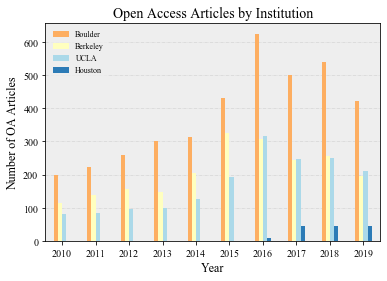

In [99]:
#How has that changed over the past 10 years?

plt.rcParams["font.family"] = "Times New Roman"

my_colors = '#fdae61','#ffffbf', '#abd9e9', '#2c7bb6'
oaplot = all_oa.plot.bar(x='date', 
                          y=['cub counts', 'ucb counts', 'ucla counts', 'uh counts'], 
                          color=my_colors, zorder=10, rot=0)

# formatting
oaplot.set_facecolor('#eeeeee')
oaplot.set_ylabel('Number of OA Articles', fontsize=12)
oaplot.set_xlabel('Year', fontsize=12)
oaplot.set_title('Open Access Articles by Institution', fontsize=14)
oaplot.grid(color='#CCCCCC', linestyle='-.', linewidth=.5, axis='y', zorder=0)
oaplot.legend(["Boulder", "Berkeley", "UCLA", "Houston"], facecolor='#eeeeee', edgecolor='#eeeeee', fontsize=8)

fig = oaplot.get_figure()

In [100]:
fig.savefig('OAinst.png', dpi=300)

In [101]:
#But it's probably more helpful to determine the percent. 
#Let's grab a date column and the percent column from the prior tables. 

all = [all_ucb['date'], all_ucb['percent'], all_cub['percent'], all_ucla['percent'], all_uh['percent']]

headers = ["Year", "Berkeley", "Boulder", "UCLA", "Houston"]

percent_oa = pd.concat(all, axis=1, keys=headers)
percent_oa = percent_oa.drop(10)
percent_oa

,Year,Berkeley,Boulder,UCLA,Houston
0,2010,26.904762,36.900369,28.873239,0.000000
1,2011,30.376940,39.092496,28.522337,0.000000
2,2012,30.693069,42.071197,31.250000,0.000000
3,2013,27.599244,40.810811,31.152648,0.000000
4,2014,37.937385,42.448980,35.593220,0.000000
5,2015,52.512156,55.886158,45.843230,0.000000
6,2016,55.197133,70.861678,64.489796,4.402516
7,2017,54.444444,60.168472,54.746137,28.571429
8,2018,54.371002,60.470325,54.366812,29.299363
9,2019,44.318182,51.970443,45.299145,27.878788


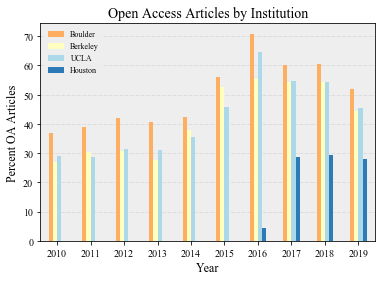

In [106]:
#How has the percentage of Open Access articles in the Earth Sciences
#changed over the past 10 years for each institution?

oaplot = percent_oa.plot.bar(x='Year', 
                          y=['Boulder', 'Berkeley', 'UCLA', 'Houston'], 
                          color=my_colors, zorder=10, rot=0)

# formatting
oaplot.set_facecolor('#eeeeee')
oaplot.set_ylabel('Percent OA Articles', fontsize=12)
oaplot.set_xlabel('Year', fontsize=12)
oaplot.set_title('Open Access Articles by Institution', fontsize=14)
oaplot.grid(color='#CCCCCC', linestyle='-.', linewidth=.5, axis='y', zorder=0)
oaplot.legend(["Boulder", "Berkeley", "UCLA", "Houston"], facecolor='#eeeeee', edgecolor='#eeeeee', fontsize=8)

fig = oaplot.get_figure()
fig.savefig('OAinst%.png', dpi=300)

### Now we'll examine OA status of cited articles.

For this, we'll query cited references' DOIs at unpaywall.org to determine their statuses. 

We'll start by importing the citedRefsMeta csv file

In [107]:
citedRefsMeta = pd.read_csv('C:\\Users\\phwh9568\\WebOfScience\\2020_SourceData\\citedRefsMeta.csv')

In [108]:
len(citedRefsMeta)

55580

Isolate the cited DOIs into a list:

In [109]:
doiList = citedRefsMeta['citedDOI'].tolist()
len(doiList)

55580

Now deduplicate the list so it doesn't take as long to run the queries:

In [110]:
doiList = list(dict.fromkeys(doiList))
len(doiList)

38719

We'll use a function to make this a little tidier. Like before, this code will send a request to the url and parse it's response, this time into a tuple that we'll write into a csv later.

In [56]:
def unpaycheck(doi, email):
    url = 'https://api.unpaywall.org/v2/'
    query = url+doi+'?email='+email
    response = requests.get(query)
    if response.status_code == 200:
        data = json.loads(response.content.decode('utf-8'))
        journal_is_oa = data['journal_is_oa']
        is_oa = data['is_oa']
        oa_status = data['oa_status']

    else:
        journal_is_oa = 'not_in_unpaywall'
        is_oa = 'not_in_unpaywall'
        oa_status = 'not_in_unpaywall'

    return journal_is_oa, is_oa, oa_status

Your email address is required to query unpawall:

In [59]:
email = 'you@aol.com'

Now we'll run the funtion and write the results to a csv. 

#### This will take a while and has a tendency to break. Just rerun from wherever was left off.

In [ ]:
with open('dois_OA.csv', 'a', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['citedDOI','journal_is_oa', 'is_oa', 'oa_status'])
    for doi in doiList[36247:]:
        if type(doi) is float:
            pass
        else:
            result = unpaycheck(doi, email)
            writer.writerow([doi, result[0], result[1], result[2]])

Done? 
#### Great! 

In [111]:
dois_OA = pd.read_csv('C:\\Users\\phwh9568\\WebOfScience\\2020_SourceData\\dois_OA.csv')

Now join it back to the citedRefsMeta dataframe:

In [112]:
citedRefsMeta = citedRefsMeta.merge(dois_OA, on='citedDOI', how='left')

In [113]:
citedRefsMeta

,Inst,citingDOI,CR,citedDOI,title,journal_book,date,issn1,issn1Type,issn2,issn2Type,isbn,journal_is_oa,is_oa,oa_status
0,CUBoulder,10.1029/2017JD028081,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1007/s10584-016-1750-x,Projected changes in tropical cyclone activity...,Climatic Change,2016.0,0165-0009,print,1573-1480,electronic,NaN,FALSE,FALSE,closed
1,CUBoulder,10.1029/2017JD028081,"Bao JW, 2006, MON WEATHER REV, V134, P1063, DO...",10.1175/MWR3123.1,Interpretation of Enhanced Integrated Water Va...,Monthly Weather Review,2006.0,0027-0644,print,1520-0493,electronic,NaN,FALSE,TRUE,hybrid
2,CUBoulder,10.1029/2017JD028081,"Bonne JL, 2015, J GEOPHYS RES-ATMOS, V120, P29...",10.1002/2014JD022602,The summer 2012 Greenland heat wave: In situ a...,Journal of Geophysical Research: Atmospheres,2015.0,2169-897X,print,NaN,NaN,NaN,FALSE,TRUE,green
3,CUBoulder,10.1029/2017JD028081,"Bosilovich MG, 2015, J CLIMATE, V28, P3631, DO...",10.1175/JCLI-D-14-00623.1,Evaluating Observation Influence on Regional W...,Journal of Climate,2015.0,0894-8755,print,1520-0442,electronic,NaN,FALSE,TRUE,hybrid
4,CUBoulder,10.1029/2017JD028081,"Coplen TB, 2008, GEOPHYS RES LETT, V35, DOI 10...",10.1029/2008GL035481,Extreme changes in stable hydrogen isotopes an...,Geophysical Research Letters,2008.0,0094-8276,print,NaN,NaN,NaN,FALSE,TRUE,green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55576,Houston,10.1007/s12517-017-3354-9,"Robb LJ., 2013, INTRO ORE FORMING PR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55577,Houston,10.1007/s12517-017-3354-9,"Smythe DM, 2013, MINER ENG, V52, P52, DOI 10.1...",10.1016/j.mineng.2013.03.010,Rare Earth Element deportment studies utilisin...,Minerals Engineering,2013.0,0892-6875,print,NaN,NaN,NaN,False,False,closed
55578,Houston,10.1007/s12517-017-3354-9,"Sweatman T, 1995, AUST AGEN INT DEV, V91",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55579,Houston,10.1007/s12517-017-3354-9,"White NC, 1995, SOC EC GEOLOGISTS NE, V23, P9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Unpaywall sends some results back as "TRUE" and "FALSE" and others as "True"/"False", so we need to standardize those:

In [114]:
citedRefsMeta['is_oa'] = citedRefsMeta['is_oa'].replace(['TRUE'],'True')
citedRefsMeta['is_oa'] = citedRefsMeta['is_oa'].replace(['FALSE'],'False')

In [115]:
# Double check values of 'is_oa' field:
citedRefsMeta['is_oa'].unique()

array(['False', 'True', nan, 'not_in_unpaywall'], dtype=object)

### Next, if we want to compare institutions, we'll need to do a little data munging. 

We'll start by splitting each institution off:

In [116]:
Boulder = citedRefsMeta.loc[citedRefsMeta['Inst']=='CUBoulder']
Berkeley = citedRefsMeta.loc[citedRefsMeta['Inst']=='Berkeley']
UCLA = citedRefsMeta.loc[citedRefsMeta['Inst']=='UCLA']
Houston = citedRefsMeta.loc[citedRefsMeta['Inst']=='Houston']

Next, we'll prepare variables to add to a new dataframe. For each institution, we'll need the total number of cited references, the total number of cited references where 'is_oa' is 'True', where 'is_oa' is 'False', and where 'is_oa' is either 'not_in_unpaywall' or 'nan' (nan values did not have a DOI we could query). We'll group nans and 'not_in_unpaywall' into a new category named "Unknown"

In [117]:
BoulderOA = [len(Boulder), len(Boulder.is_oa.loc[Boulder.is_oa == 'True']), len(Boulder.is_oa.loc[Boulder.is_oa == 'False']), len(Boulder.loc[Boulder['is_oa'].isna()]) + len(Boulder.loc[Boulder['is_oa']=='not_in_unpaywall'])]
BerkeleyOA = [len(Berkeley), len(Berkeley.is_oa.loc[Berkeley.is_oa == 'True']), len(Berkeley.is_oa.loc[Berkeley.is_oa == 'False']), len(Berkeley.loc[Berkeley['is_oa'].isna()]) + len(Berkeley.loc[Berkeley['is_oa']=='not_in_unpaywall'])]
UCLAOA = [len(UCLA), len(UCLA.is_oa.loc[UCLA.is_oa == 'True']), len(UCLA.is_oa.loc[UCLA.is_oa == 'False']), len(UCLA.loc[UCLA['is_oa'].isna()]) + len(UCLA.loc[UCLA['is_oa']=='not_in_unpaywall'])]
HoustonOA = [len(Houston),len(Houston.is_oa.loc[Houston.is_oa == 'True']), len(Houston.is_oa.loc[Houston.is_oa == 'False']), len(Houston.loc[Houston['is_oa'].isna()]) + len(Houston.loc[Houston['is_oa']=='not_in_unpaywall'])]

Declare the rows for your new dataframe:

In [118]:
rows = ['Boulder', 'Berkeley', 'UCLA', 'Houston']

These variables will make up the columns. cr=total cited references, oa=True values (that is, oa cited refs), notoa=False values (not oa cited refs), and unknown = unknown oa status

In [119]:
cr = [BoulderOA[0], BerkeleyOA[0], UCLAOA[0], HoustonOA[0]]
oa = [BoulderOA[1], BerkeleyOA[1], UCLAOA[1], HoustonOA[1]]
notoa = [BoulderOA[2], BerkeleyOA[2], UCLAOA[2], HoustonOA[2]]
unknown = [BoulderOA[3], BerkeleyOA[3], UCLAOA[3], HoustonOA[3]]

Create the dataframe:

In [120]:
d = {'Inst': rows, 'TotalCR': cr, 'OA': oa, 'Not_OA': notoa, 'Unknown': unknown}
df = pd.DataFrame(data=d)
df

,Inst,TotalCR,OA,Not_OA,Unknown
0,Boulder,24042,10025,9629,4388
1,Berkeley,16852,5109,7960,3783
2,UCLA,13085,4851,5779,2455
3,Houston,1602,370,816,416


Next, calculate percentages of oa, not oa, and unknown for each institution:

In [121]:
df['OAperc'] = (df['OA']/(df['OA'] + df['Not_OA'] + df['Unknown']))*100
df['Not_OAperc'] = (df['Not_OA']/(df['OA'] + df['Not_OA'] + df['Unknown']))*100
df['Unknownperc'] = (df['Unknown']/(df['OA'] + df['Not_OA'] + df['Unknown']))*100

In [122]:
df

,Inst,TotalCR,OA,Not_OA,Unknown,OAperc,Not_OAperc,Unknownperc
0,Boulder,24042,10025,9629,4388,41.697862,40.050745,18.251393
1,Berkeley,16852,5109,7960,3783,30.316876,47.234750,22.448374
2,UCLA,13085,4851,5779,2455,37.072984,44.165075,18.761941
3,Houston,1602,370,816,416,23.096130,50.936330,25.967541


#### Now make a pretty graph!

Text(0.5, 0, 'Institutions')

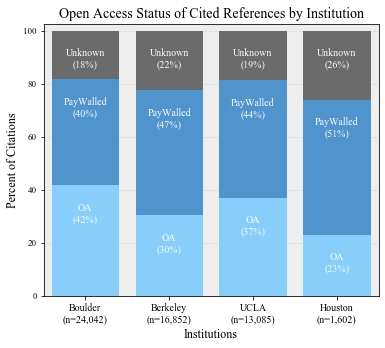

In [133]:
fig1 = plt.figure(figsize=(6,5))

ax = fig1.add_subplot()

# figure formatting
plt.grid(color='#CCCCCC', linestyle='-.', linewidth=.5, axis='y', zorder=0)
plt.xticks(np.arange(4), ('Boulder\n'+'(n={:,})'.format(df.TotalCR[0]), 
                          'Berkeley\n'+'(n={:,})'.format(df.TotalCR[1]), 
                          'UCLA\n'+'(n={:,})'.format(df.TotalCR[2]), 
                          'Houston\n'+'(n={:,})'.format(df.TotalCR[3])))
plt.yticks(fontsize=9)
plt.margins(0.025)
ax.set_facecolor('#eeeeee')

# bars
bar1 = ax.bar(x = df.Inst, height = df.OAperc, label = 'OA', zorder=5, color='#87CEFA')
bar2 = ax.bar(x = df.Inst, height = df.Not_OAperc, bottom=df.OAperc, label = 'Paywalled', zorder=5, color='#4F94CD')
bar3 = ax.bar(x = df.Inst, height = df.Unknownperc, bottom=df.OAperc+df.Not_OAperc, label='Unknown', zorder=5, color='#6B6B6B' )


# bar annotations
for b1, b2, b3, p1, p2, p3 in zip(bar1, bar2, bar3, df.OAperc, df.Not_OAperc, df.Unknownperc):
    bh1 = b1.get_height()
    bh2 = b2.get_height() + bh1
    bh3 = b3.get_height() + bh2
    plt.annotate('OA\n({}%)'.format(int(round(p1))), xy=(b1.get_x() + b1.get_width()/2,bh1-14), ha='center', fontsize=10, color='white',  fontweight='bold', zorder=6)
    plt.annotate('PayWalled\n({}%)'.format(int(round(p2))), xy=(b2.get_x() + b2.get_width()/2,bh2-14), ha='center', fontsize=10, color='white',  fontweight='bold', zorder=6)
    plt.annotate('Unknown\n({}%)'.format(int(round(p3))), xy=(b3.get_x() + b3.get_width()/2,bh3-14), ha='center', fontsize=10, color='white',  fontweight='bold', zorder=6)
    
#for b, n in zip(bar1, df.TotalCR):
#    plt.annotate('n={:,}'.format(n), xy=(b.get_x() + b.get_width()/2, 2 ), ha='center', fontsize=12, color='white',  fontweight='bold', zorder=6)

    
# axis labels and titles
plt.title('Open Access Status of Cited References by Institution', fontsize=14)
plt.ylabel('Percent of Citations', fontsize=12)
plt.xlabel('Institutions', fontsize=12)

# legend
#plt.legend(framealpha=0, prop={'size': 13},  bbox_to_anchor=(1, 1), loc='upper left')

Export your new graph:

In [134]:
fig1.savefig('C:\\Users\\phwh9568\\WebOfScience\\2020_SourceData\\OAcitations.png', dpi=300)